In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
dadosRH = pd.read_csv('dadosRH.csv')

In [6]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [7]:
dadosRH.shape

(54808, 11)

In [8]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [9]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


<AxesSubplot:xlabel='educacao', ylabel='count'>

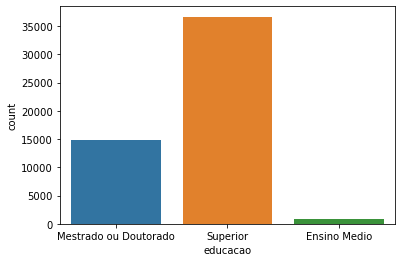

In [10]:
sns.countplot(dadosRH['educacao'])

In [11]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

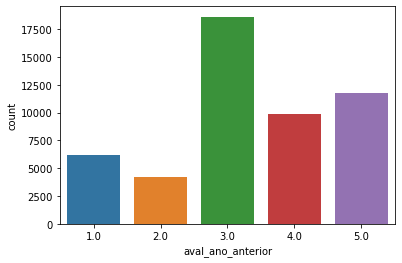

In [12]:
sns.countplot(dadosRH['aval_ano_anterior'])

In [13]:
#Aplicando imputação e preencher os valores ausentes
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [14]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)

In [15]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [16]:
dadosRH.shape

(54808, 11)

In [17]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [18]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


In [19]:
#Verificar o balanceamento de classe na variavel "promovido"
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot:xlabel='promovido', ylabel='count'>

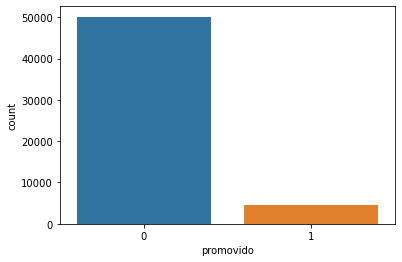

In [20]:
sns.countplot(dadosRH['promovido'])

In [21]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [22]:
df_classe_majoritaria.shape

(50140, 11)

In [23]:
df_classe_minoritaria.shape

(4668, 11)

In [24]:
#Upsample da classe minoritária resample- faz reamostragem (aumentar a classe minoritária para equiparar os valores da majoritária)
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria,
                                          replace = True,
                                          n_samples = 50140,
                                          random_state = 150)

In [25]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria,df_classe_minoritaria_upsampled])

In [26]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [27]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


<AxesSubplot:xlabel='promovido', ylabel='count'>

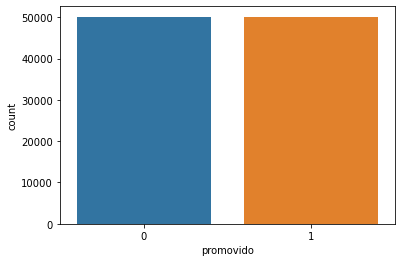

In [28]:
sns.countplot(dadosRH_balanceados['promovido'])

In [29]:
#os dados estão balanceados, salvando o dataset com os dados manipulados
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

In [30]:
#Agora carregamos os dados e seguimos com a análise
#A parti daqui executaremos no Power BI
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [31]:
dataset.shape

(100280, 11)

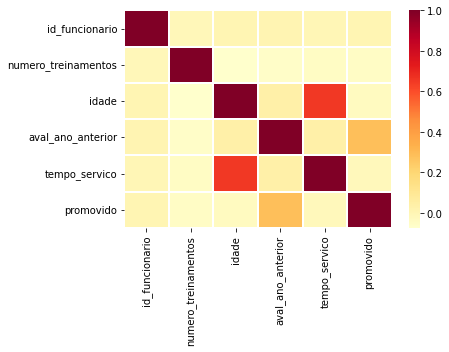

In [32]:
#Pergunta 1 - Qual a correlação entre os atributos dos funcionários?
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

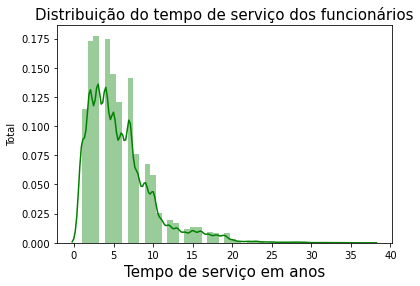

In [33]:
#Pergunta 2 - Qual o tempo de serviço da maioria dos funcionários?
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = "green")
plt.title('Distribuição do tempo de serviço dos funcionários', fontsize = 15)
plt.xlabel('Tempo de serviço em anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

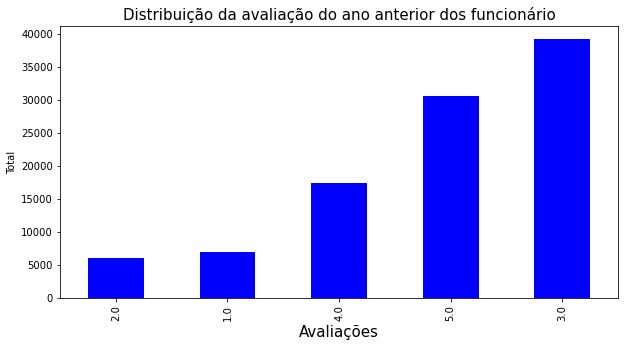

In [34]:
#Pergunta 3 - Qual a avaliação do ano anterior foi mais comum?
import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize = (10, 5))
plt.title('Distribuição da avaliação do ano anterior dos funcionário', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')
plt.show()

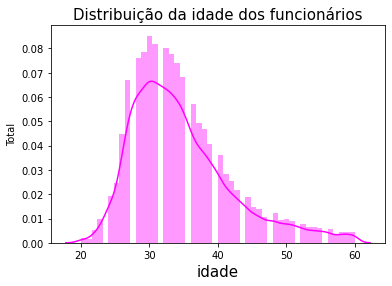

In [35]:
# Pergunta 4 - Qual a distribuição das idades dos funcionários?
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta')
plt.title('Distribuição da idade dos funcionários', fontsize = 15)
plt.xlabel('idade', fontsize = 15)
plt.ylabel('Total')
plt.show()

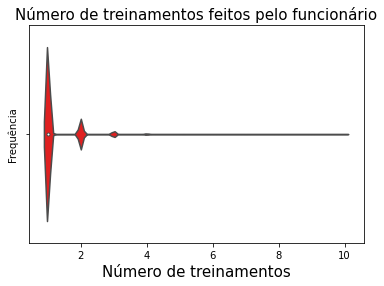

In [36]:
#Pergunta 5 - Qual o número de treinamentos mais frequente?
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title('Número de treinamentos feitos pelo funcionário', fontsize = 15)
plt.xlabel('Número de treinamentos', fontsize = 15)
plt.ylabel('Frequência')
plt.show()

In [37]:
# Pergunta 6 - Qual a proporção dos funcionarios por canal de recrutamento?
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

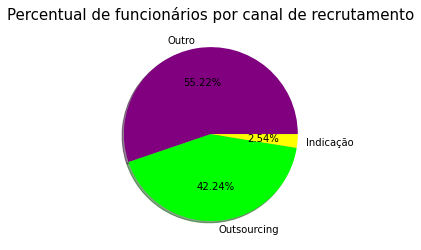

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['purple', 'lime', 'yellow']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual de funcionários por canal de recrutamento', fontsize = 15)
plt.axis('off')
#plt.legend()
plt.show()

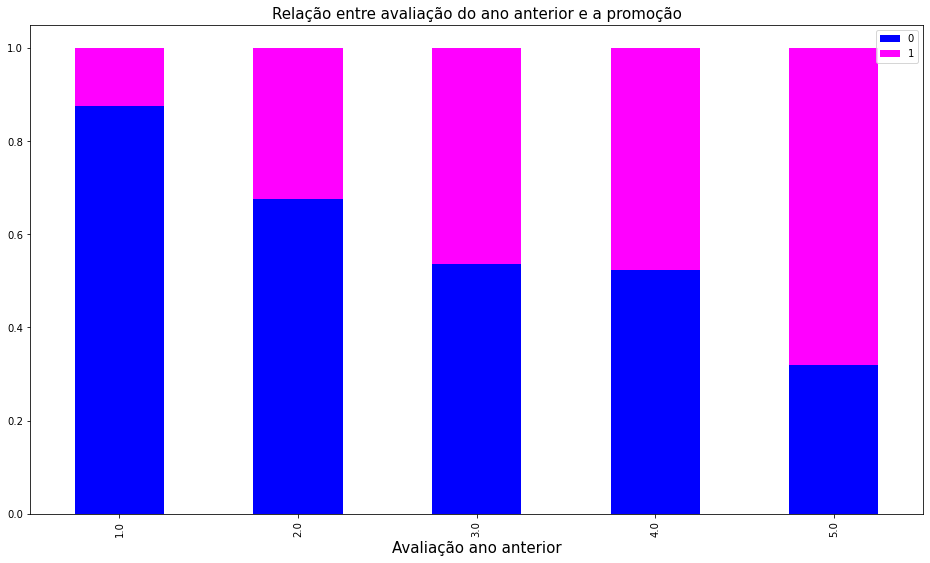

In [39]:
# Pergunta 7 - Qual a relação entre a promoção e a avaliação do ano anterior?
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                  stacked = True,
                                                  figsize = (16, 9),
                                                  color = ['blue', 'magenta'])
plt.title('Relação entre avaliação do ano anterior e a promoção', fontsize = 15)
plt.xlabel('Avaliação ano anterior', fontsize = 15)
plt.legend()
plt.show()

In [40]:
#Fim